In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from peakutils.baseline import baseline
from ramannoodles import spectrafit

In [3]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMALDEHYDE',
 'FORMIC ACID',
 'N-PENTANE',
 'WATER']

In [70]:
# extract spectra data
data = shoyu_data_dict['WATER']
x_data = data['x']
y_data = data['y']

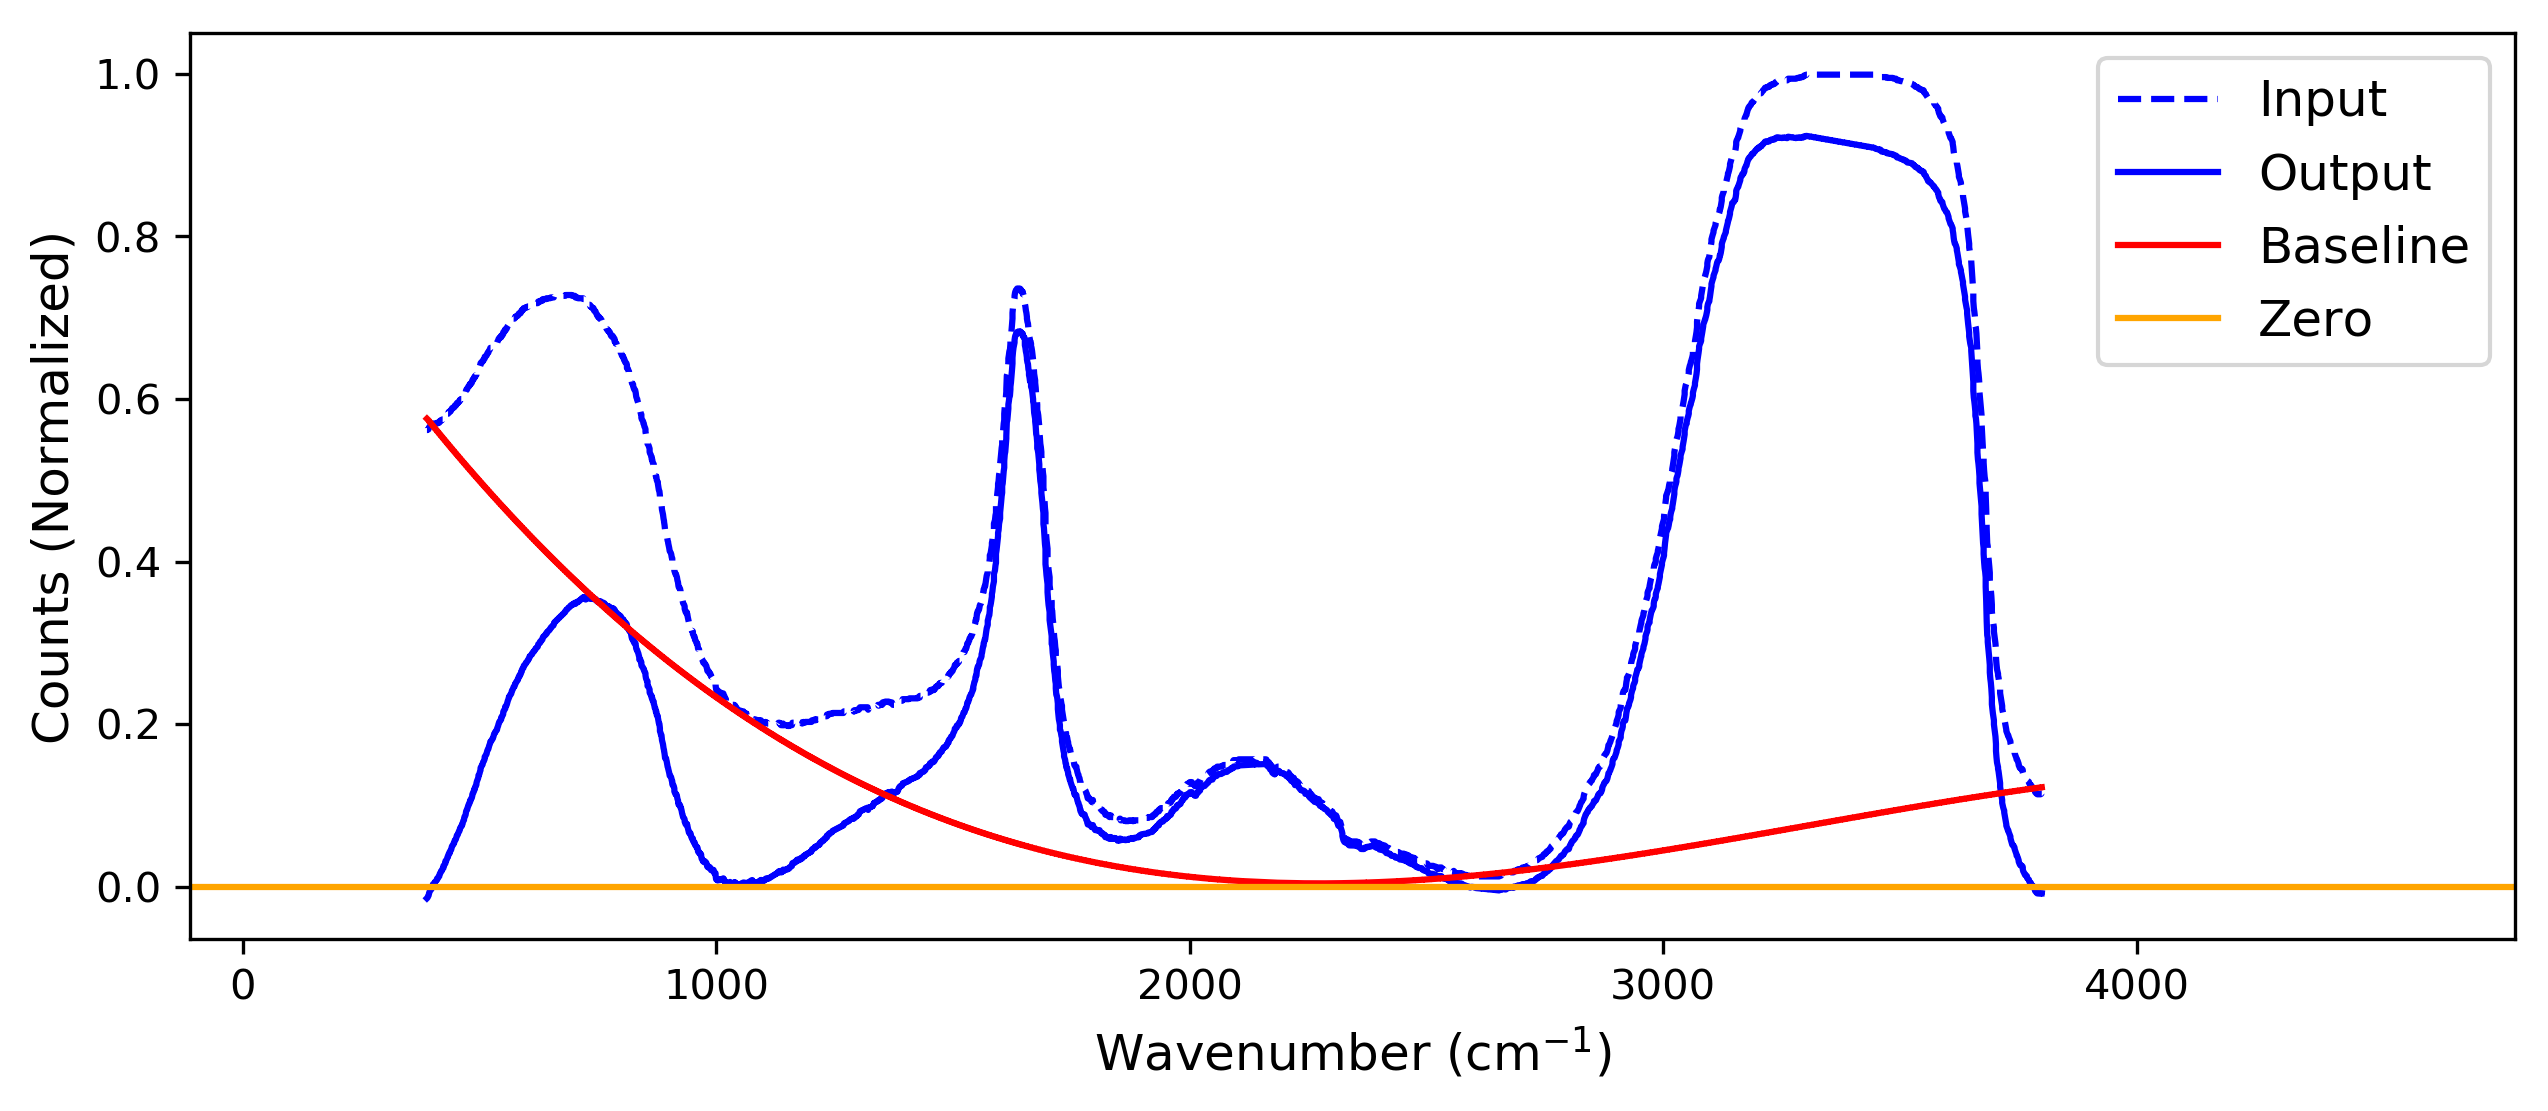

In [85]:
y_base = baseline(y_data, deg=3, max_it=200)
# to avoid strange results,
# change all negative values to zero
yb_plus = [0 if i < 0 else i for i in y_base]
y_out = y_data - yb_plus
# plot that lets you see the baseline fitting

plt.figure(figsize=(10,4), dpi=300)
plt.plot(x_data, y_data, 'b--', label='Input')
plt.plot(x_data, y_out, 'b', label='Output')
plt.plot(x_data, yb_plus, 'r', label='Baseline')
# plt.plot(x_data, y_base, 'r--', label='negative baseline')
plt.axhline(y=0, color='orange', label='Zero') 
plt.legend(loc=1, fontsize=12)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
plt.ylabel('Counts (Normalized)', fontsize=12)
plt.xlim(min(x_data)-500, max(x_data)+1000)

plt.savefig('baseline_example_water.png')

In [43]:
# extract spectra data
data = shoyu_data_dict['DIMETHYL KETONE']
x_data = 10000/data['x']
y_data = data['y']


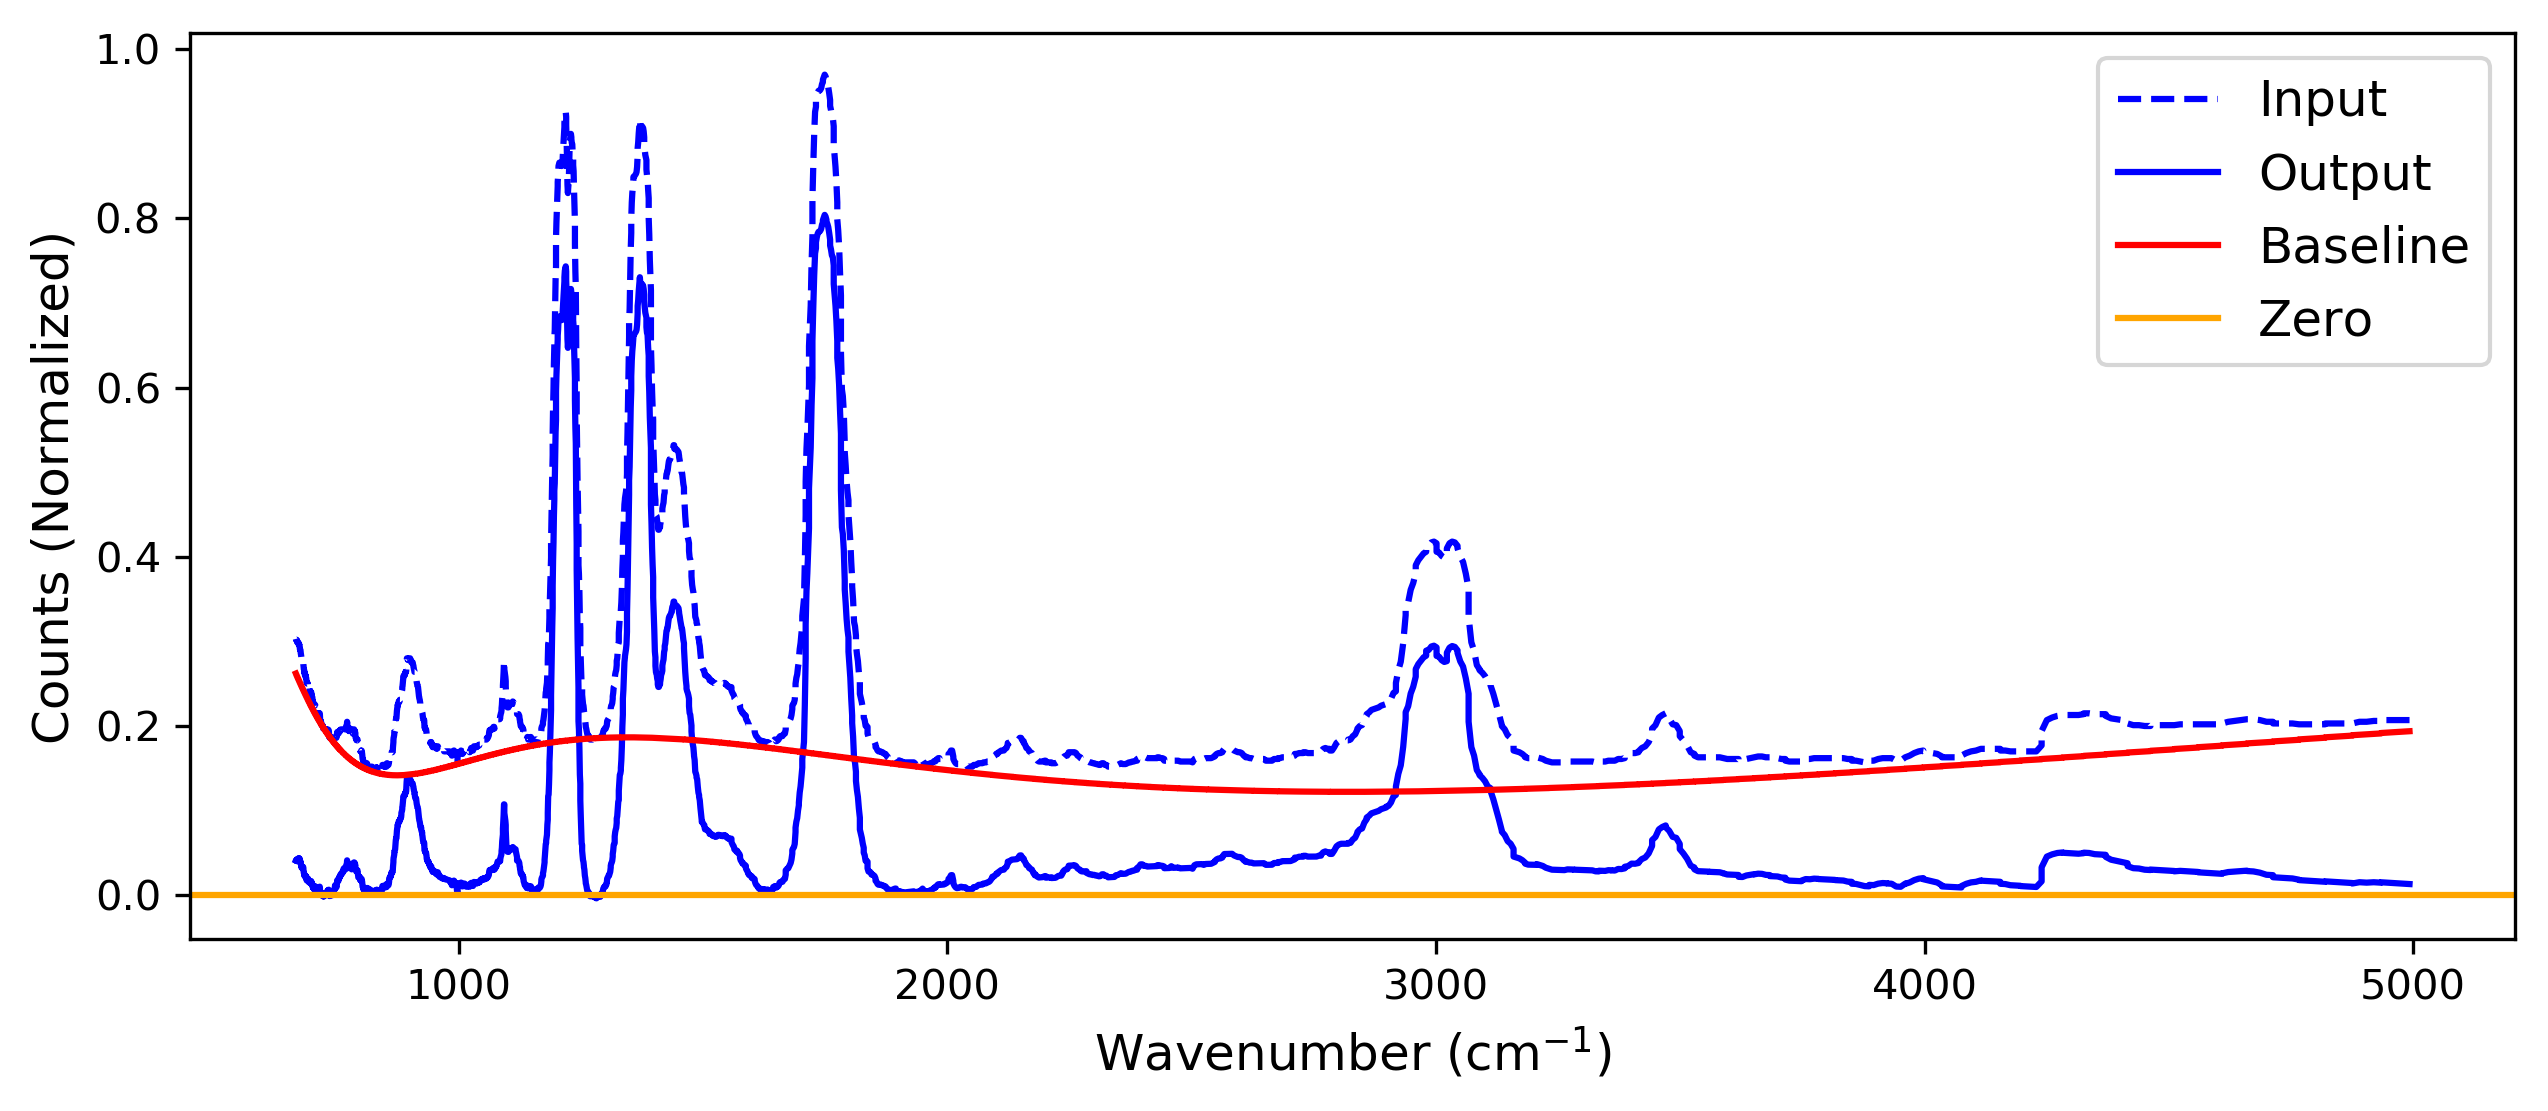

In [69]:
y_base = baseline(y_data, deg=5, max_it=200)
# to avoid strange results,
# change all negative values to zero
yb_plus = [0 if i < 0 else i for i in y_base]
y_out = y_data - yb_plus
# plot that lets you see the baseline fitting

plt.figure(figsize=(10,4), dpi=300)
plt.plot(x_data, y_data, 'b--', label='Input')
plt.plot(x_data, y_out, 'b', label='Output')
plt.plot(x_data, yb_plus, 'r', label='Baseline')
# plt.plot(x_data, y_base, 'r--', label='negative baseline')
plt.axhline(y=0, color='orange', alpha=1, label='Zero') 
plt.legend(loc=1, fontsize = 12)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize = 12)
plt.ylabel('Counts (Normalized)', fontsize = 12)
# plt.savefig('baseline_example.png')

In [86]:
# extract spectra data
data = shoyu_data_dict['CARBON MONOXIDE']
x_data = data['x']
y_data = data['y']

[[Model]]
    (Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 130
    # data points      = 3574
    # variables        = 8
    chi-square         = 2.20981072
    reduced chi-square = 6.1969e-04
    Akaike info crit   = -26390.6199
    Bayesian info crit = -26341.1684
[[Variables]]
    p1_sigma:      26.8784903 (init = 1)
    p1_center:     2109.85482 (init = 2119.855)
    p1_amplitude:  66.7644631 (init = 1)
    p1_fwhm:       53.7569806 == '2.0000000*p1_sigma'
    p1_height:     0.85400000 (init = 0.854)
    p2_sigma:      21.1897866 (init = 1)
    p2_center:     2183.63592 (init = 2176.035)
    p2_amplitude:  52.0596257 (init = 1)
    p2_fwhm:       42.3795733 == '2.0000000*p2_sigma'
    p2_height:     0.85400000 (init = 0.854)



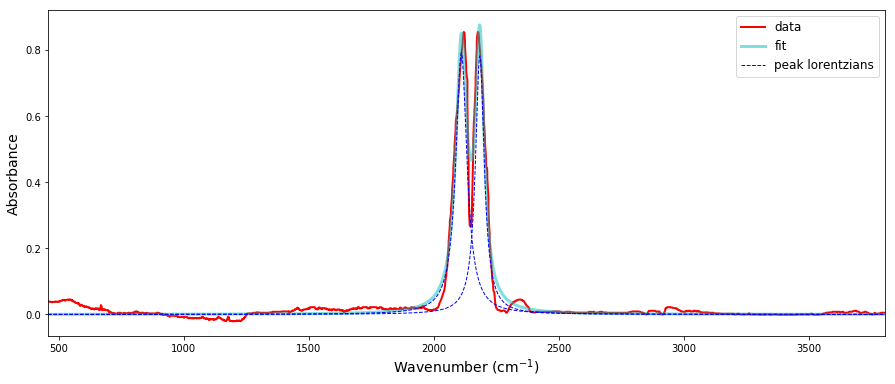

In [87]:
# detect peaks
peaks, peak_list = spectrafit.peak_detect(x_data, y_data)
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)
# fit the model to the data
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)
# plot fit results
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

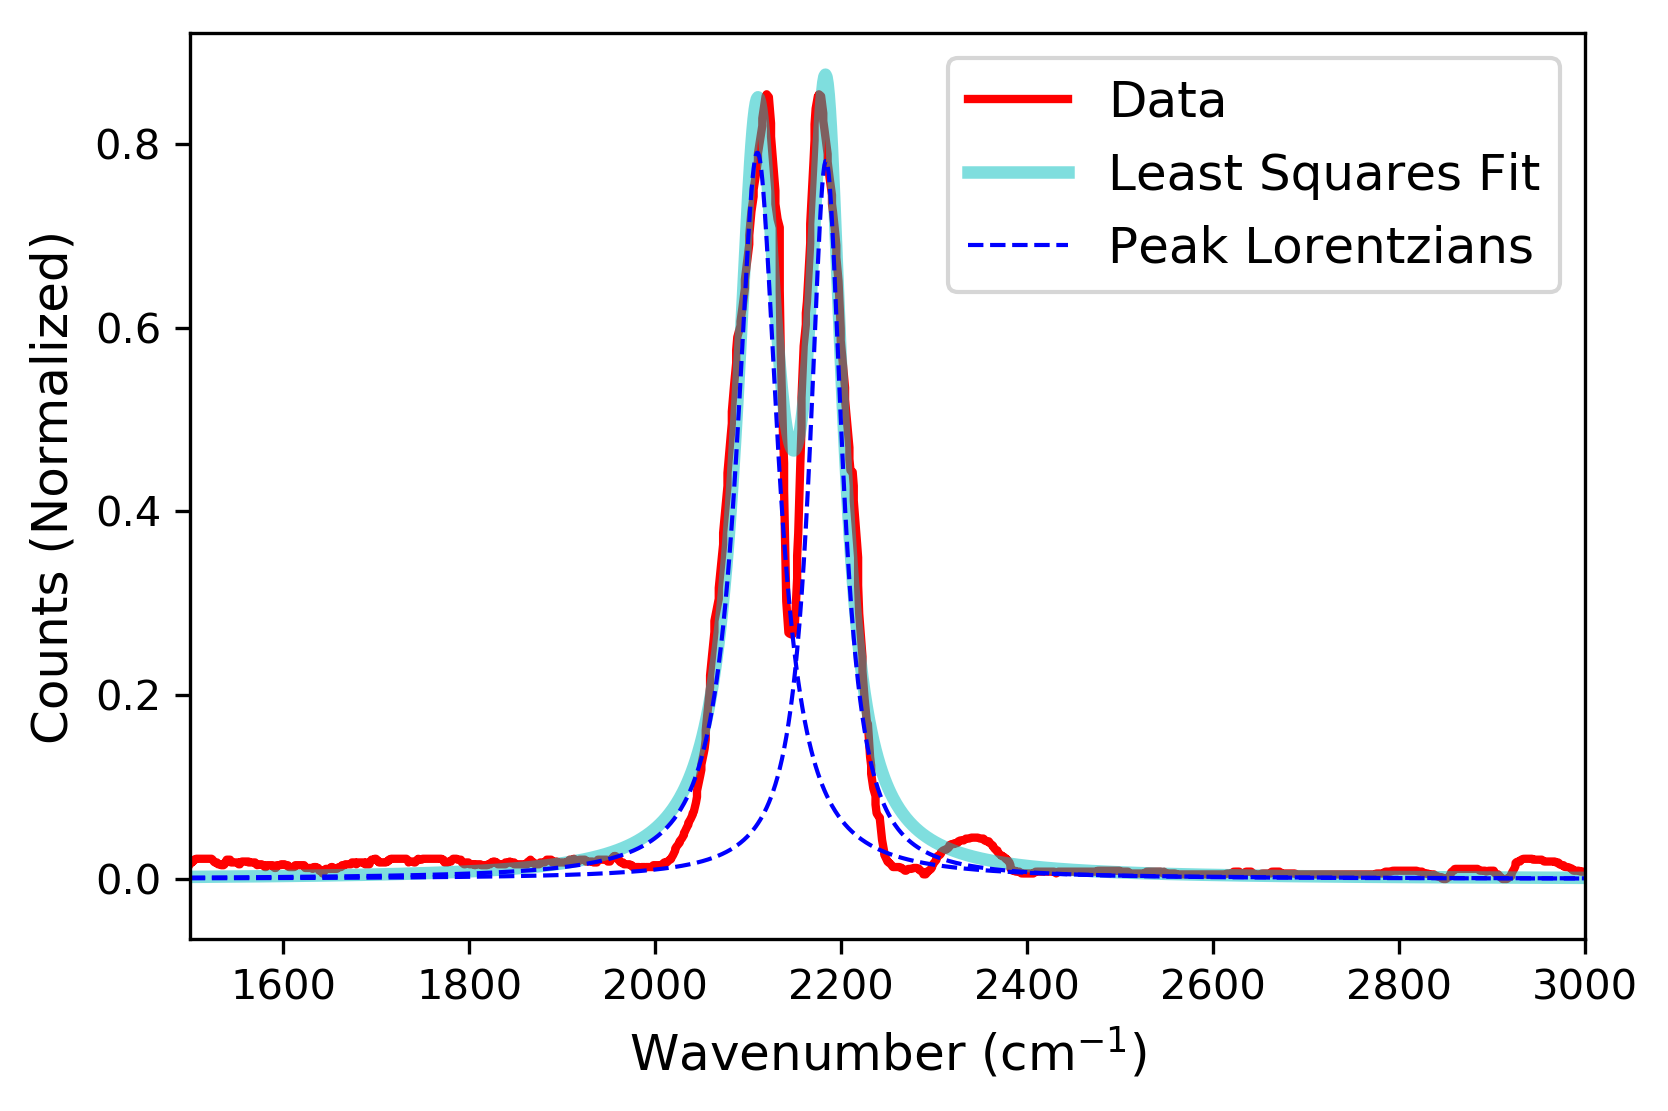

In [121]:
fit_result = out
fig = plt.figure(figsize=(6,4), dpi=300)
plt.ylabel('Counts (Normalized)', fontsize=12)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
plt.xlim(min(x_data), max(x_data))
# plt.ylim(min(y_data)-(max(y_data)-min(y_data))*0.1, max(y_data)+(max(y_data)-min(y_data))*0.1)
plt.plot(x_data, y_data, 'r', alpha=1, linewidth=2, label='Data')
plt.plot(x_data, fit_result.best_fit, 'c-', alpha=0.5, linewidth=3, label='Least Squares Fit')
comps = fit_result.eval_components(x=x_data)
prefix = 'p{}_'.format(1)
plt.plot(x_data, comps[prefix], 'b--', linewidth=1, label='Peak Lorentzians')
for i in range(1, int(len(fit_result.values)/5)):
    prefix = 'p{}_'.format(i+1)
    plt.plot(x_data, comps[prefix], 'b--', linewidth=1)
plt.legend(fontsize=12, loc=1)
plt.xlim(1500, 3000)
# plt.ylim(-0.1, 1.3)
# plt.show()
# plt.savefig('fit_example_plot.png')

# $f_{i}(x, A, \mu, \sigma) = \frac{A}{\pi}\left[\frac{\mu}{\left(x - \mu\right)^{2} + \mu^{2}}\right]$

# $f(x) = \sum\limits_{i=1}^{n} f_{i}(x, A, \mu, \sigma)$